In [4]:
import pandas as pd
import numpy as np

from keras.models import Sequential 
import keras
pd.options.display.max_rows = 10

%matplotlib inline
import matplotlib.pyplot as plt



In [5]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

In [6]:
df_train.shape
df_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


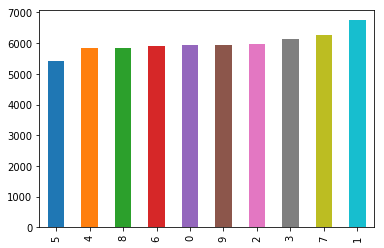

In [7]:
# Counting each number data
df_train["5"].value_counts().sort_values(ascending = True).plot.bar()

In [8]:
x_train = df_train.iloc[ :,1:]/255
y_train = df_train.iloc[ :,:1]

x_test = df_test.iloc[:,1:]/255
y_test = df_test.iloc[ :,:1]



In [7]:
y_test["7"].value_counts()

1    1135
2    1032
7    1027
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 7, dtype: int64

In [37]:

#Creating model

In [9]:
x_train.shape

Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [10]:
model = keras.Sequential()
model.add(keras.layers.InputLayer((784, ))) 
model.add(keras.layers.Dense(800, activation = "relu"))
model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
(model.fit(x_train, Y_train
          , batch_size=128
          , validation_data=(x_test, Y_test)
          , epochs=10))

Train on 59999 samples, validate on 9999 samples
Epoch 1/10
59999/59999 [==============================] - 19s 310us/step - loss: 0.2092 - acc: 0.9387 - val_loss: 0.1019 - val_acc: 0.9691
Epoch 2/10
59999/59999 [==============================] - 17s 281us/step - loss: 0.0747 - acc: 0.9765 - val_loss: 0.0776 - val_acc: 0.9746
Epoch 3/10
59999/59999 [==============================] - 18s 293us/step - loss: 0.0491 - acc: 0.9841 - val_loss: 0.0745 - val_acc: 0.9755
Epoch 4/10
59999/59999 [==============================] - 17s 283us/step - loss: 0.0329 - acc: 0.9893 - val_loss: 0.0859 - val_acc: 0.9741
Epoch 5/10
59999/59999 [==============================] - 17s 285us/step - loss: 0.0264 - acc: 0.9913 - val_loss: 0.0693 - val_acc: 0.9803
Epoch 6/10
59999/59999 [==============================] - 17s 284us/step - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0631 - val_acc: 0.9818
Epoch 7/10
59999/59999 [==============================] - 17s 287us/step - loss: 0.0177 - acc: 0.9941 - val_loss: 0.0

In [12]:
x_cv = x_train.iloc[:1,:]
x_cv.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


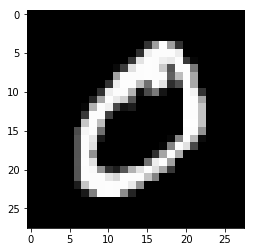

In [13]:
plt.imshow(x_cv.values.reshape((28, 28)), cmap = "gray")

In [14]:
model.predict(x_cv)

array([[1.0000000e+00, 2.1757800e-12, 1.6678070e-10, 2.6484012e-13,
        9.6579998e-14, 1.4232017e-15, 3.1375816e-10, 3.2862588e-13,
        1.5762650e-13, 7.2526797e-11]], dtype=float32)